In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data=pd.read_csv("estonia-passenger-list.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  989 non-null    int64 
 1   Country      989 non-null    object
 2   Firstname    989 non-null    object
 3   Lastname     989 non-null    object
 4   Sex          989 non-null    object
 5   Age          989 non-null    int64 
 6   Category     989 non-null    object
 7   Survived     989 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 61.9+ KB


In [4]:
data

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0
...,...,...,...,...,...,...,...,...
984,985,Sweden,ANNA INGRID BIRGITTA,OSTROM,F,60,P,0
985,986,Sweden,ELMAR MIKAEL,OUN,M,34,P,1
986,987,Sweden,ENN,QUNAPUU,M,77,P,0
987,988,Sweden,LY,GUNAPUU,F,87,P,0


In [5]:
data=pd.get_dummies(data,columns=["Sex","Category"],drop_first=True)

In [6]:
data["Country"].value_counts()

Sweden           550
Estonia          344
Latvia            28
Finland           16
Russia            14
Norway             9
Germany            8
Denmark            6
Lithuania          4
Netherlands        2
Great Britain      2
Morocco            2
Canada             1
Nigeria            1
Belarus            1
France             1
Name: Country, dtype: int64

In [7]:
data.describe(include=["O"])

,Country,Firstname,Lastname
count,989,989,989
unique,16,849,774
top,Sweden,ANDRES,ANDERSSON
freq,550,8,15


In [8]:
data["Lastname"].value_counts()[:20]

ANDERSSON     15
NILSSON       12
ERIKSSON      11
KARLSSON       9
JOHANSSON      9
SVENSSON       8
GUSTAFSSON     8
PERSSON        8
PETTERSSON     6
JONSSON        6
LINDSTROM      5
LARSSON        5
GUSTAVSSON     5
OLSSON         4
MAGNUSSON      4
KUKK           4
CARLSSON       4
STOLTZ         3
KIKAS          3
SJOSTROM       3
Name: Lastname, dtype: int64

In [9]:
data[data["Lastname"]=="ANDERSSON"]

,PassengerId,Country,Firstname,Lastname,Age,Survived,Sex_M,Category_P
22,23,Sweden,AGNE KARL ARVID,ANDERSSON,62,0,1,1
23,24,Sweden,ANNA LENA,ANDERSSON,28,0,0,1
24,25,Sweden,INGRID VIOLA AMALIA,ANDERSSON,72,0,0,1
25,26,Sweden,IRIS VIKTORIA,ANDERSSON,75,0,0,1
26,27,Sweden,JILL MARIA,ANDERSSON,33,0,0,1
27,28,Sweden,KAJ OLAV ARTHUR,ANDERSSON,42,0,1,1
28,29,Sweden,KARL ERIK,ANDERSSON,74,0,1,1
29,30,Sweden,LARS MAGNUS,ANDERSSON,33,0,1,0
30,31,Sweden,MONICA INGEGERD,ANDERSSON,41,0,0,1
31,32,Sweden,PER ALBERT,ANDERSSON,50,1,1,1


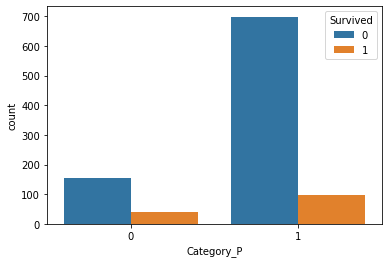

In [10]:
sns.countplot(data["Category_P"],hue=data["Survived"])

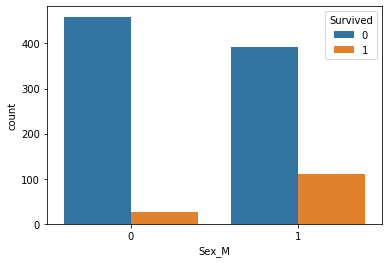

In [11]:
sns.countplot(data["Sex_M"],hue=data["Survived"])

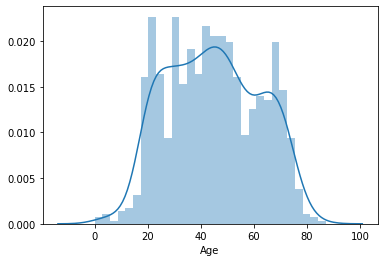

In [12]:
sns.distplot(data["Age"],bins=30)

In [13]:
data[data["Category_P"]==0].Country.value_counts()

Estonia    169
Sweden      15
Russia       7
Finland      2
Name: Country, dtype: int64

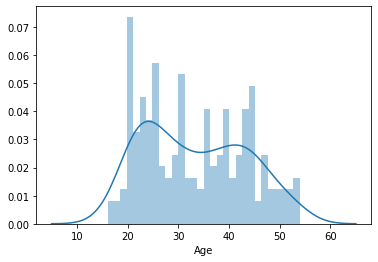

In [14]:
sns.distplot(data[data["Category_P"]==0].Age,bins=30)

In [15]:
#last age of a crew member is 54
data[data["Age"]>54]

,PassengerId,Country,Firstname,Lastname,Age,Survived,Sex_M,Category_P
0,1,Sweden,ARVID KALLE,AADLI,62,0,1,1
4,5,Sweden,BRITTA ELISABET,AHLSTROM,55,0,0,1
5,6,Sweden,GERD INGA MAGNHILD,AHLSTROM,71,0,0,1
6,7,Sweden,HJALMAR,AHLSTROM,60,0,1,1
9,10,Sweden,ANNA MARIA,ALDRIN,63,0,0,1
...,...,...,...,...,...,...,...,...
978,979,Sweden,STEN LEONARD,ASTROM,73,0,1,1
979,980,Denmark,KNUD,OQLLGAARD,67,0,1,1
984,985,Sweden,ANNA INGRID BIRGITTA,OSTROM,60,0,0,1
986,987,Sweden,ENN,QUNAPUU,77,0,1,1


In [16]:
data[data["Age"]>54]["Survived"]

0      0
4      0
5      0
6      0
9      0
      ..
978    0
979    0
984    0
986    0
987    0
Name: Survived, Length: 301, dtype: int64

In [17]:
data[(data["Age"]>54) & (data["Survived"]==1)]

,PassengerId,Country,Firstname,Lastname,Age,Survived,Sex_M,Category_P
129,130,Sweden,MARIANNE ELLEN ELISABET,EHN,59,1,0,1
284,285,Finland,VILHO VALTTERI,ITARANTA,60,1,1,1
312,313,Sweden,STEN KARL RUDOLF,JOLIND,64,1,1,1
414,415,Estonia,VASILI,KRJUTSKOV,67,1,1,1
452,453,Sweden,LARS OLOF,LAMKE,63,1,1,1
650,651,Sweden,TURE EMANUEL,PALMGREN,63,1,1,1
740,741,Sweden,BERT REINESON,ROOS,65,1,1,1


In [18]:
country=data[data["Category_P"]==0].Country.unique()

In [19]:
df=pd.DataFrame()
for i in range(0,989):
     if (data["Country"][i] not in country):
            df=data.iloc[i:]

In [20]:
df

,PassengerId,Country,Firstname,Lastname,Age,Survived,Sex_M,Category_P
979,980,Denmark,KNUD,OQLLGAARD,67,0,1,1
980,981,Sweden,GUNHILD ANNA-LISA,OMAR,54,0,0,1
981,982,Sweden,LARS TORSTEN,OSTERBERG,48,1,1,1
982,983,Sweden,MAUD HELENA,QSTERVALL,24,0,0,1
983,984,Sweden,GUNNEL MARIE,OSTLUND,51,0,0,1
984,985,Sweden,ANNA INGRID BIRGITTA,OSTROM,60,0,0,1
985,986,Sweden,ELMAR MIKAEL,OUN,34,1,1,1
986,987,Sweden,ENN,QUNAPUU,77,0,1,1
987,988,Sweden,LY,GUNAPUU,87,0,0,1
988,989,Sweden,CARL,OVBERG,42,1,1,1


In [21]:
data["Country"][i] 

'Sweden'

In [24]:
data

,PassengerId,Country,Firstname,Lastname,Age,Survived,Sex_M,Category_P
0,1,Sweden,ARVID KALLE,AADLI,62,0,1,1
1,2,Estonia,LEA,AALISTE,22,0,0,0
2,3,Estonia,AIRI,AAVASTE,21,0,0,0
3,4,Sweden,JURI,AAVIK,53,0,1,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,55,0,0,1
...,...,...,...,...,...,...,...,...
984,985,Sweden,ANNA INGRID BIRGITTA,OSTROM,60,0,0,1
985,986,Sweden,ELMAR MIKAEL,OUN,34,1,1,1
986,987,Sweden,ENN,QUNAPUU,77,0,1,1
987,988,Sweden,LY,GUNAPUU,87,0,0,1


In [25]:
data1=data.drop(["Firstname","Lastname"],axis=1)

In [26]:
data1

,PassengerId,Country,Age,Survived,Sex_M,Category_P
0,1,Sweden,62,0,1,1
1,2,Estonia,22,0,0,0
2,3,Estonia,21,0,0,0
3,4,Sweden,53,0,1,0
4,5,Sweden,55,0,0,1
...,...,...,...,...,...,...
984,985,Sweden,60,0,0,1
985,986,Sweden,34,1,1,1
986,987,Sweden,77,0,1,1
987,988,Sweden,87,0,0,1


In [27]:
y=data1["Survived"]
X=data1[["PassengerId","Country","Age","Sex_M","Category_P"]]

In [28]:
X

,PassengerId,Country,Age,Sex_M,Category_P
0,1,Sweden,62,1,1
1,2,Estonia,22,0,0
2,3,Estonia,21,0,0
3,4,Sweden,53,1,0
4,5,Sweden,55,0,1
...,...,...,...,...,...
984,985,Sweden,60,0,1
985,986,Sweden,34,1,1
986,987,Sweden,77,1,1
987,988,Sweden,87,0,1


In [29]:
from sklearn.model_selection import train_test_split

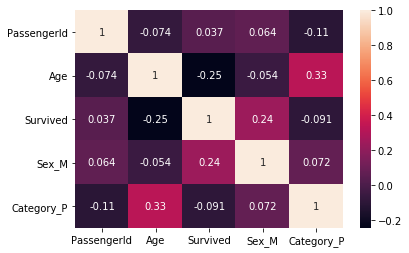

In [30]:
sns.heatmap(data.corr(),annot=True)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [37]:
y_train.value_counts()

0    597
1     95
Name: Survived, dtype: int64

In [38]:
#We can see that we have a highly imbalanced dataset but before applying SMOTE we should try other models as well

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

In [39]:
from sklearn.metrics import confusion_matrix,classification_report

In [35]:
X=pd.get_dummies(X,columns=["Country"])

In [41]:
model=LogisticRegression(random_state=42)
model.fit(X_train,y_train)

C:\Users\ravi.g\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_pred=model.predict(X_test)


In [43]:
import plotly.express as px
import cufflinks as cf 
cf.go_offline()

In [44]:
from sklearn.preprocessing import normalize

In [117]:
normalize(y_pred[:,np.newaxis],axis=0)

array([[ 1.84764557e-02],
       [ 5.33609599e-02],
       [ 9.32965665e-02],
       [ 1.79242726e-03],
       [ 5.20391953e-02],
       [ 6.82321553e-02],
       [ 8.34593040e-02],
       [-1.94892299e-02],
       [ 3.23390399e-02],
       [ 9.85078381e-02],
       [ 5.22253469e-02],
       [ 8.86199821e-02],
       [ 1.61945946e-01],
       [ 8.95942070e-02],
       [ 6.64987628e-02],
       [ 1.41440501e-02],
       [ 3.13596027e-02],
       [ 5.83573703e-02],
       [ 6.44234553e-02],
       [ 5.13940290e-02],
       [ 9.31136885e-02],
       [ 5.16317514e-02],
       [-9.46506818e-05],
       [ 5.85819816e-02],
       [ 4.09621482e-02],
       [ 7.23296541e-02],
       [ 5.51486187e-02],
       [ 3.84084708e-02],
       [ 3.78508315e-02],
       [ 1.30071273e-01],
       [ 8.13720074e-02],
       [ 5.93759535e-02],
       [ 3.15412813e-04],
       [-2.19509206e-02],
       [ 1.20610686e-02],
       [ 8.62985788e-02],
       [ 5.47268340e-02],
       [ 1.07897665e-01],
       [ 7.3

In [45]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int6

In [49]:
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[249   6]
 [ 41   1]]


              precision    recall  f1-score   support

           0       0.86      0.98      0.91       255
           1       0.14      0.02      0.04        42

    accuracy                           0.84       297
   macro avg       0.50      0.50      0.48       297
weighted avg       0.76      0.84      0.79       297



In [51]:
model=LogisticRegression(random_state=42,class_weight="balanced")
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[178  77]
 [ 11  31]]


              precision    recall  f1-score   support

           0       0.94      0.70      0.80       255
           1       0.29      0.74      0.41        42

    accuracy                           0.70       297
   macro avg       0.61      0.72      0.61       297
weighted avg       0.85      0.70      0.75       297



C:\Users\ravi.g\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [54]:
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[243  12]
 [ 36   6]]


              precision    recall  f1-score   support

           0       0.87      0.95      0.91       255
           1       0.33      0.14      0.20        42

    accuracy                           0.84       297
   macro avg       0.60      0.55      0.56       297
weighted avg       0.79      0.84      0.81       297



In [57]:
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[226  29]
 [ 29  13]]


              precision    recall  f1-score   support

           0       0.89      0.89      0.89       255
           1       0.31      0.31      0.31        42

    accuracy                           0.80       297
   macro avg       0.60      0.60      0.60       297
weighted avg       0.80      0.80      0.80       297



In [60]:
#When class_wghit is none then its predicting only 1
model=SVC(random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[255   0]
 [ 42   0]]


              precision    recall  f1-score   support

           0       0.86      1.00      0.92       255
           1       0.00      0.00      0.00        42

    accuracy                           0.86       297
   macro avg       0.43      0.50      0.46       297
weighted avg       0.74      0.86      0.79       297



C:\Users\ravi.g\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [61]:
#When class_wghit is none then its predicting only 1
model=SVC(random_state=42,class_weight="balanced")
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[194  61]
 [ 32  10]]


              precision    recall  f1-score   support

           0       0.86      0.76      0.81       255
           1       0.14      0.24      0.18        42

    accuracy                           0.69       297
   macro avg       0.50      0.50      0.49       297
weighted avg       0.76      0.69      0.72       297



In [63]:
#A lot of False 1s 
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[147 108]
 [  8  34]]


              precision    recall  f1-score   support

           0       0.95      0.58      0.72       255
           1       0.24      0.81      0.37        42

    accuracy                           0.61       297
   macro avg       0.59      0.69      0.54       297
weighted avg       0.85      0.61      0.67       297



In [71]:
model=KNeighborsClassifier(n_neighbors=2,weights="distance")
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[218  37]
 [ 33   9]]


              precision    recall  f1-score   support

           0       0.87      0.85      0.86       255
           1       0.20      0.21      0.20        42

    accuracy                           0.76       297
   macro avg       0.53      0.53      0.53       297
weighted avg       0.77      0.76      0.77       297



In [85]:
kmeans=KMeans(n_clusters=10)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [86]:
kmeans.fit(X_train,y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [89]:
X_test["clusters"]=kmeans.predict(X_test.drop(["clusters","survived"],axis=1))

In [90]:
X_test["survived"]=y_test

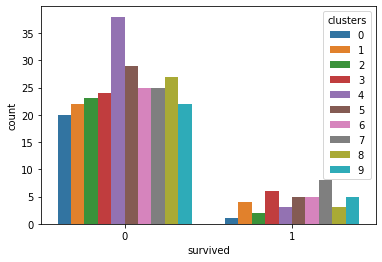

In [91]:
sns.countplot(X_test["survived"],hue=X_test["clusters"])

Even clustering cannot identify any special relations b/w survived and other objects 
Although we saw that age can be the only sole feature which shows any promise 

In [96]:
data["Age"].value_counts()

21    27
45    27
67    25
30    25
50    24
      ..
9      1
12     1
15     1
81     1
0      1
Name: Age, Length: 78, dtype: int64

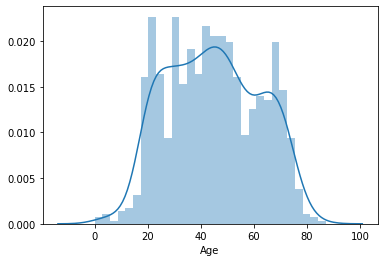

In [98]:
sns.distplot(data["Age"],bins=30)

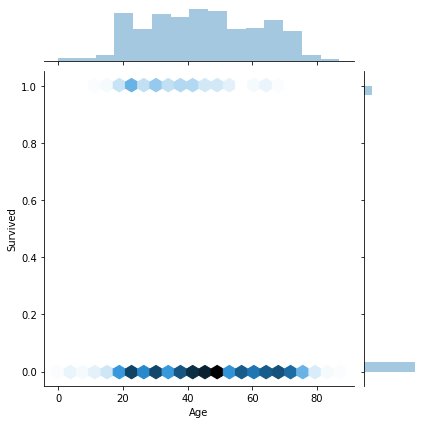

In [104]:
sns.jointplot(x="Age",y="Survived",data=data,kind="hex")

In [116]:
# Percentage of people survived 
data[data["Survived"]==1]["Age"].value_counts()/data["Age"].value_counts()[data[data["Survived"]==1]["Age"].value_counts().index]*100

43     38.095238
21     29.629630
23     42.105263
31     36.842105
29     28.571429
24     27.272727
38     33.333333
22     26.315789
37     23.809524
26     38.461538
50     16.666667
30     16.000000
34     22.222222
45     14.814815
19     30.769231
25     33.333333
35     25.000000
33     23.076923
36     16.666667
18     16.666667
54     21.428571
41     14.285714
42     15.000000
20     20.000000
47     11.111111
32     15.384615
63     11.111111
48     11.764706
28     15.384615
51      9.523810
16     33.333333
15    100.000000
67      4.000000
65      7.692308
39      6.666667
44      6.250000
46      6.250000
52      8.333333
53      5.882353
59      7.692308
60      7.692308
64      5.555556
12    100.000000
Name: Age, dtype: float64

In [121]:
data["Age"].value_counts()

21    27
45    27
67    25
30    25
50    24
      ..
9      1
12     1
15     1
81     1
0      1
Name: Age, Length: 78, dtype: int64

In [122]:
data["Age"].value_counts()[data[data["Survived"]==1]["Age"].value_counts().index]

43    21
21    27
23    19
31    19
29    21
24    22
38    15
22    19
37    21
26    13
50    24
30    25
34    18
45    27
19    13
25    12
35    16
33    13
36    18
18    18
54    14
41    21
42    20
20    15
47    18
32    13
63    18
48    17
28    13
51    21
16     3
15     1
67    25
65    13
39    15
44    16
46    16
52    12
53    17
59    13
60    13
64    18
12     1
Name: Age, dtype: int64

In [124]:
# Percentage of people dead by age 
data[data["Survived"]==0]["Age"].value_counts()/data["Age"].value_counts()[data[data["Survived"]==0]["Age"].value_counts().index]*100

49    100.000000
67     96.000000
45     85.185185
30     84.000000
50     83.333333
         ...    
87    100.000000
6     100.000000
9     100.000000
81    100.000000
0     100.000000
Name: Age, Length: 76, dtype: float64

In [125]:
data["Age"].value_counts()[data[data["Survived"]==0]["Age"].value_counts().index]

49    24
67    25
45    27
30    25
50    24
      ..
87     1
6      1
9      1
81     1
0      1
Name: Age, Length: 76, dtype: int64

In [126]:
from imblearn.over_sampling import SMOTE

In [127]:
sm=SMOTE(random_state=42,k_neighbors=3)

,PassengerId,Age,Sex_M,Category_P,Country_Belarus,Country_Canada,Country_Denmark,Country_Estonia,Country_Finland,Country_France,Country_Germany,Country_Great Britain,Country_Latvia,Country_Lithuania,Country_Morocco,Country_Netherlands,Country_Nigeria,Country_Norway,Country_Russia,Country_Sweden
634,635,62,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
935,936,48,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
572,573,48,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
923,924,24,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
404,405,16,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,37,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
270,271,65,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
860,861,27,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
435,436,35,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [133]:
X_train_new,y_train_new=sm.fit_sample(X_train,y_train)

AttributeError: 'SMOTE' object has no attribute '_validate_data'

In [136]:
import sklearn
sklearn.show_versions()


System:
    python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\ravi.g\Anaconda3\python.exe
   machine: Windows-10-10.0.17134-SP0

Python dependencies:
       pip: 20.0.2
setuptools: 45.2.0.post20200210
   sklearn: 0.22.1
     numpy: 1.18.1
     scipy: 1.4.1
    Cython: 0.29.15
    pandas: 1.0.1
matplotlib: 3.1.3
    joblib: 0.14.1

Built with OpenMP: True
